# 1. Download the dataset
# 2. Load the dataset

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Churn_Modelling.csv")
df.shape

(10000, 14)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

# 3. Perform Below Visualizations

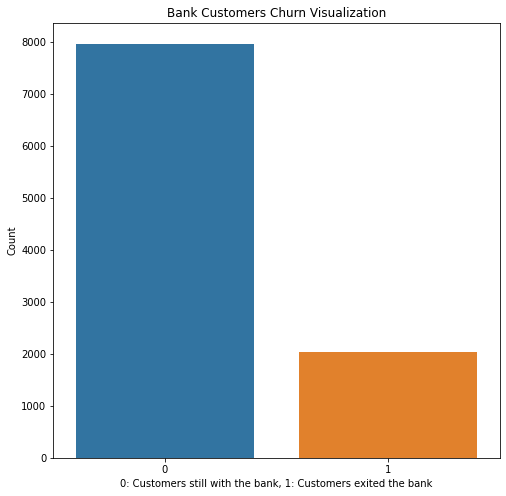

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))
sns.countplot(x="Exited", data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariate Analysis

In [ ]:
df[['Age','Tenure','EstimatedSalary','CreditScore','Balance','NumOfProducts']].describe()

,Age,Tenure,EstimatedSalary,CreditScore,Balance,NumOfProducts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,5.012800,100090.239881,650.528800,76485.889288,1.530200
std,10.487806,2.892174,57510.492818,96.653299,62397.405202,0.581654
min,18.000000,0.000000,11.580000,350.000000,0.000000,1.000000
25%,32.000000,3.000000,51002.110000,584.000000,0.000000,1.000000
50%,37.000000,5.000000,100193.915000,652.000000,97198.540000,1.000000
75%,44.000000,7.000000,149388.247500,718.000000,127644.240000,2.000000
max,92.000000,10.000000,199992.480000,850.000000,250898.090000,4.000000


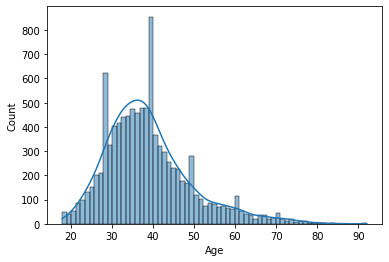

In [ ]:
sns.histplot(df.Age,kde=True)

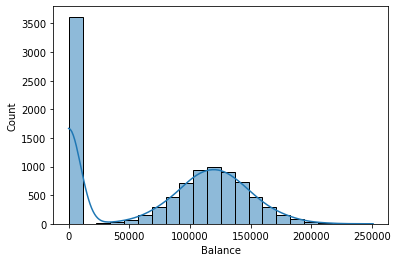

In [ ]:
sns.histplot(df.Balance,kde=True)

 Univariate Analysis of Categorical Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


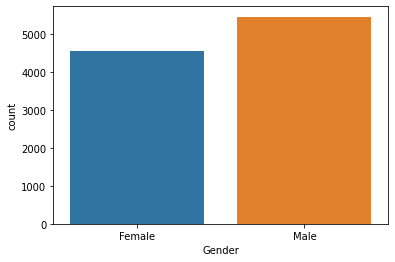

In [ ]:
# plot count plot for the gender column
sns.countplot(df.Gender)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


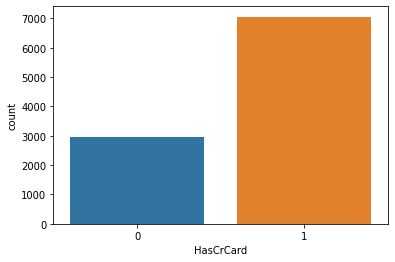

In [ ]:
sns.countplot(df.HasCrCard) 

# Bivariate analysis

In [ ]:
df[['Age','Tenure','EstimatedSalary','CreditScore','Balance','NumOfProducts']].corr()

,Age,Tenure,EstimatedSalary,CreditScore,Balance,NumOfProducts
Age,1.000000,-0.009997,-0.007201,-0.003965,0.028308,-0.030680
Tenure,-0.009997,1.000000,0.007784,0.000842,-0.012254,0.013444
EstimatedSalary,-0.007201,0.007784,1.000000,-0.001384,0.012797,0.014204
CreditScore,-0.003965,0.000842,-0.001384,1.000000,0.006268,0.012238
Balance,0.028308,-0.012254,0.012797,0.006268,1.000000,-0.304180
NumOfProducts,-0.030680,0.013444,0.014204,0.012238,-0.304180,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 2000.0)

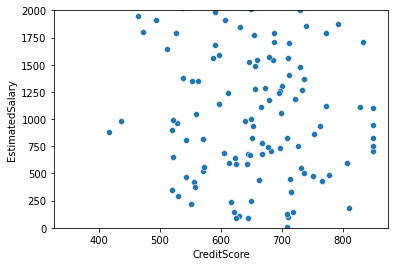

In [ ]:
sns.scatterplot(df.CreditScore,df.EstimatedSalary	)
plt.ylim(0,2000)

 Bivariate Analysis of Categorical Variables vs Continuous Variables

In [ ]:
df.groupby(by='Exited').agg('mean')[['Age','Tenure','EstimatedSalary','CreditScore','Balance','NumOfProducts']]

,Age,Tenure,EstimatedSalary,CreditScore,Balance,NumOfProducts
Exited,,,,,,
0,37.408389,5.033279,99738.391772,651.853196,72745.296779,1.544267
1,44.837997,4.932744,101465.677531,645.351497,91108.539337,1.475209


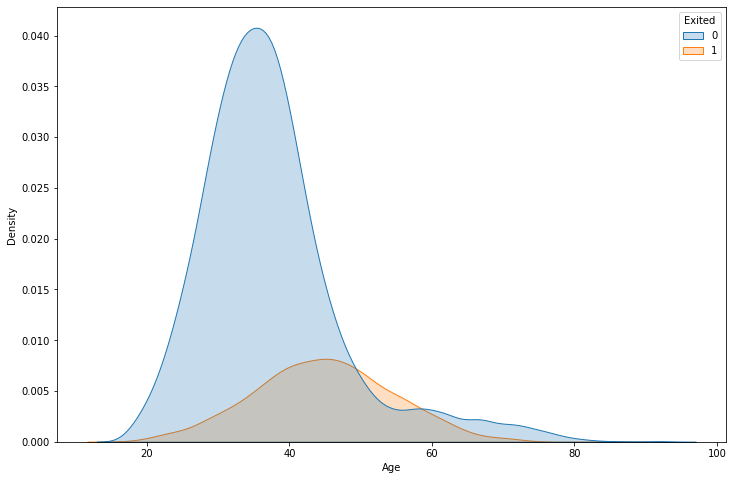

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x='Age',hue='Exited',fill=True)

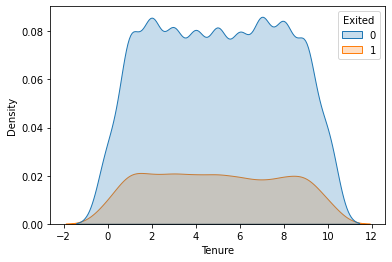

In [ ]:
sns.kdeplot(data=df,x='Tenure',hue='Exited',fill=True)


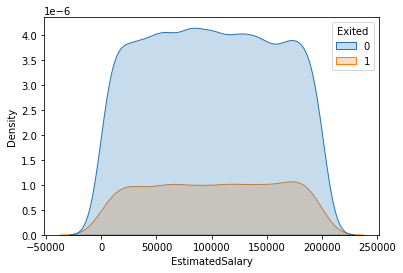

In [ ]:
sns.kdeplot(data=df,x='EstimatedSalary',hue='Exited',fill=True)

Bivariate Analysis of Categorical Variables vs Categorical Variables:

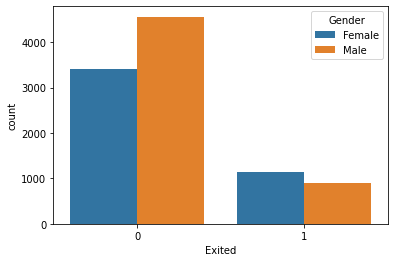

In [ ]:
sns.countplot(data=df,x='Exited',hue='Gender')

In [ ]:
pd.crosstab(df.Gender,df.Exited,margins=True)

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


# Multivariate Analysis

KeyError: ignored

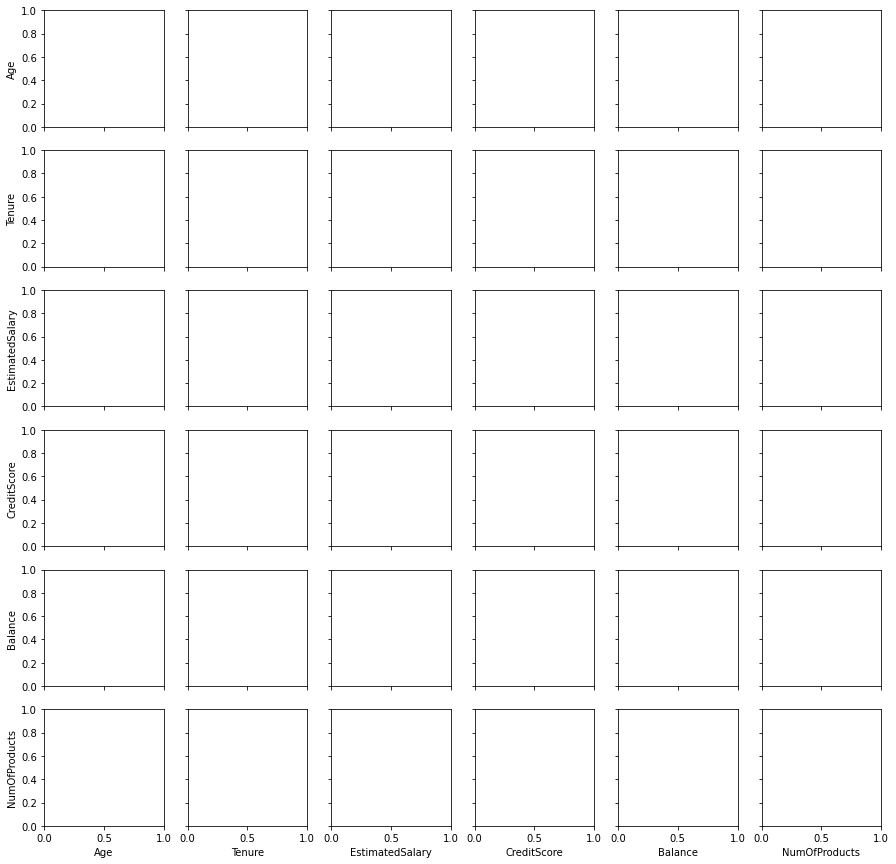

In [ ]:
sns.pairplot(data=df[['Age','Tenure','EstimatedSalary','CreditScore','Balance','NumOfProducts']],hue='Gender')

# 4. Perform descriptive statistics on the dataset

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5. Handle the Missing values.

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6. Find the outliers and replace the outliers

In [ ]:
lowerlimit=df['Age'].quantile(0.05)
lowerlimit
df[df['Age']<lowerlimit]
upperlimit=df['Age'].quantile(0.95)
upperlimit
df[df['Age']<upperlimit]
data=df[(df['Age']>lowerlimit)&(df['Age']<upperlimit)]
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 7. Check for Categorical columns and perform encoding.

In [6]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
pd.get_dummies(df, columns=["Geography"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# 8. Split the data into dependent and independent variables.

In [ ]:
X= df.iloc[ : , :-1].values   # X is dependent variable
y= df.iloc[ : , -1].values     # y is independent variable
print(X,y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


# 9. Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 10. Split the data into training and testing

In [ ]:
X=df.drop("Exited", axis=1)
y=df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=0)
print('X_train size : {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size : (8000, 10), X_test size: (2000, 10)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7389 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 875.0+ KB


In [ ]:
print('Y_train size : {}, Y_test size: {}'.format(y_train.shape, y_test.shape))

Y_train size : (8000,), Y_test size: (2000,)
